# In this notebook I plot some spectra on ROI to have a quick view on the IMAT experiment

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import os, fnmatch
from os import listdir
#%matplotlib inline
%matplotlib notebook
import scipy.signal
import matplotlib.patches as patches
from skimage.filters import threshold_otsu
# from scipy.signal import find_peaks
# print(scipy.__version__)

/home/carminati_c/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [52]:
# Constant values
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]

# t0=0.01
# L= 56.4 #[m]

# here now I put the number obtained from the flight-path calibration!
t0 = 0
L = 56.065
lambda0 = -0.00019

dL = 0

In [3]:
def tof2l(tof):
    l=lambda0+h/m*(tof-t0)/(L)/1e-10
    return l

def l2tof(l):
    tof=t0+(l*1e-10)*(L)*m/h
    return tof

In [4]:
rootpath = '/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/'
coll_dir = sorted(fnmatch.filter(listdir(rootpath),'Sample*'))
print(coll_dir)

# pathdata= "/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10090deg_Corrected/"
# pathdata_180= "/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10180deg_Corrected/"
pathOB= "/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Flat1_Corrected/"

myTOF = np.genfromtxt('/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Flat1_Corrected/IMAT00010433_VerticalSetting_2hruns_000_Spectra.txt', usecols=0)

['Sample_10090deg_Corrected', 'Sample_10099deg_Corrected', 'Sample_10108deg_Corrected', 'Sample_10117deg_Corrected', 'Sample_10126deg_Corrected', 'Sample_10135deg_Corrected', 'Sample_10144deg_Corrected', 'Sample_10153deg_Corrected', 'Sample_10162deg_Corrected', 'Sample_10171deg_Corrected', 'Sample_10180deg_Corrected']


In [6]:
# #load the dataset

# myfiles = fnmatch.filter(listdir(pathdata),'*.fits')
# coll_files = sorted(myfiles)

# myfiles_180 = fnmatch.filter(listdir(pathdata_180),'*.fits')
# coll_files_180 = sorted(myfiles_180)

# obfiles = fnmatch.filter(listdir(pathOB),'*.fits') # here there are several OB folders
# coll_ob = sorted(obfiles)


In [18]:
coll_files=[]
for i in range(0, len(coll_dir)):
# for i in range(0, 1):
    pathdata = rootpath + coll_dir[i]
    print(pathdata)
    coll_files.append(sorted(fnmatch.filter(listdir(pathdata),'*.fits')))

obfiles = fnmatch.filter(listdir(pathOB),'*.fits') # here there are several OB folders
coll_ob = sorted(obfiles)

/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10090deg_Corrected
/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10099deg_Corrected
/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10108deg_Corrected
/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10117deg_Corrected
/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10126deg_Corrected
/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10135deg_Corrected
/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10144deg_Corrected
/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10153deg_Corrected
/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10162deg_Corrected
/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10171deg_Corrected
/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10180deg_Corrected


In [20]:
coll_files[1][0:10]

['Sample_10099deg_Corrected_00000.fits',
 'Sample_10099deg_Corrected_00001.fits',
 'Sample_10099deg_Corrected_00002.fits',
 'Sample_10099deg_Corrected_00003.fits',
 'Sample_10099deg_Corrected_00004.fits',
 'Sample_10099deg_Corrected_00005.fits',
 'Sample_10099deg_Corrected_00006.fits',
 'Sample_10099deg_Corrected_00007.fits',
 'Sample_10099deg_Corrected_00008.fits',
 'Sample_10099deg_Corrected_00009.fits']

<IPython.core.display.Javascript object>


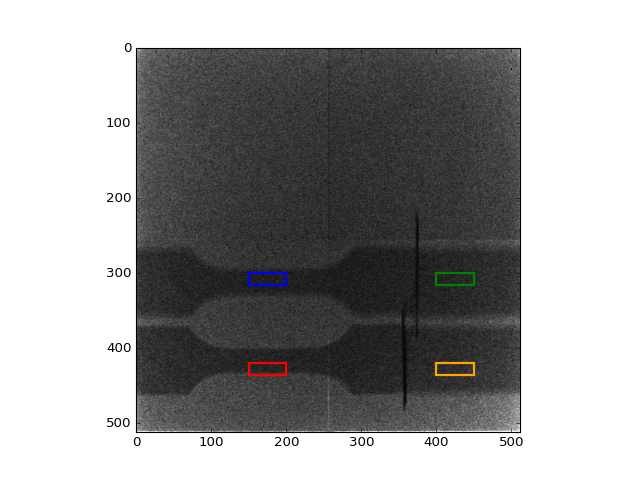

<IPython.core.display.Javascript object>


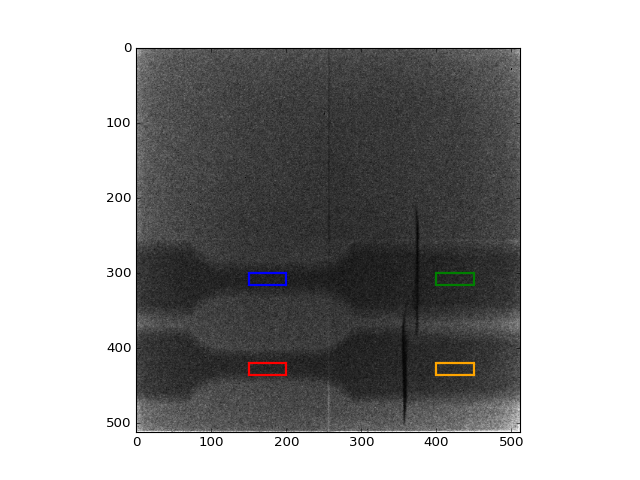

<IPython.core.display.Javascript object>


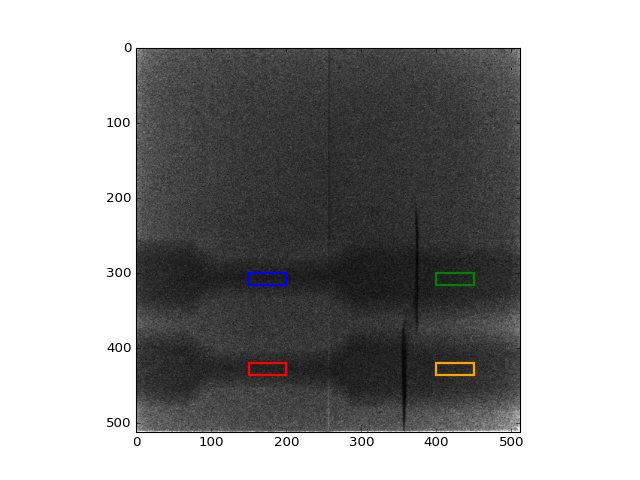

<IPython.core.display.Javascript object>


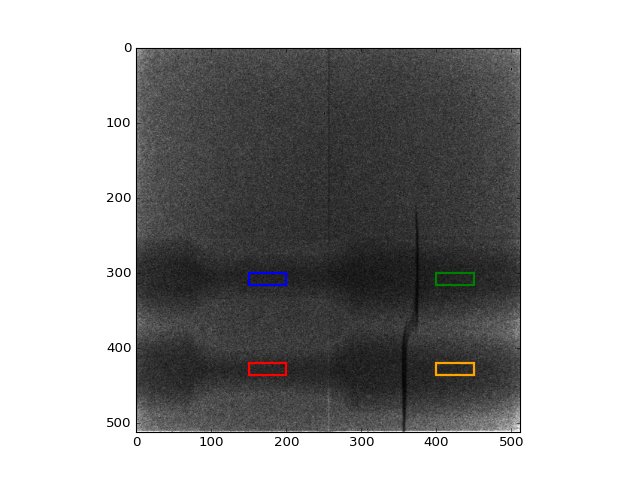

<IPython.core.display.Javascript object>


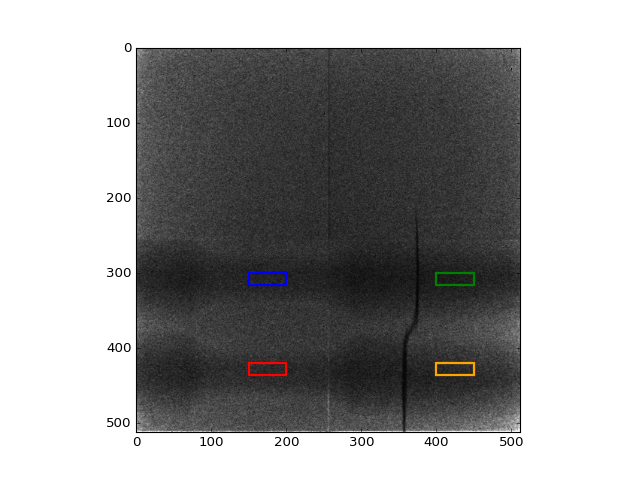

<IPython.core.display.Javascript object>


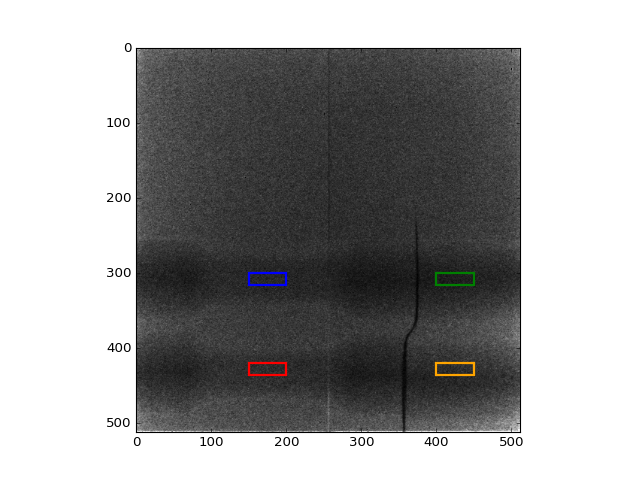

<IPython.core.display.Javascript object>


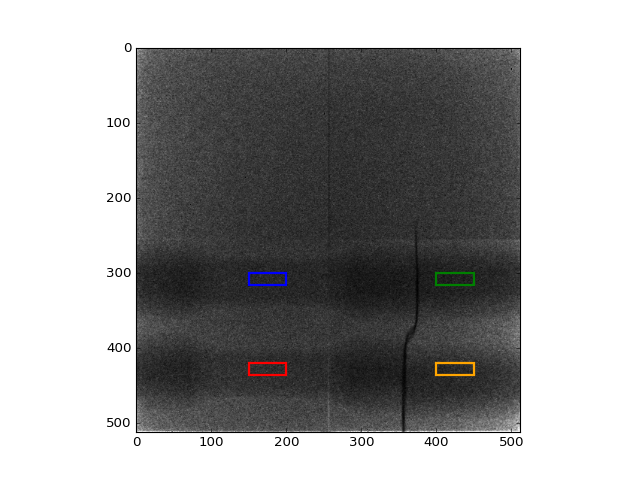

<IPython.core.display.Javascript object>


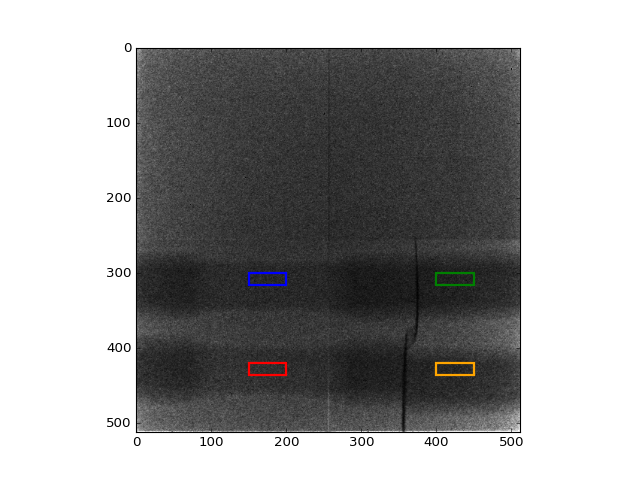

<IPython.core.display.Javascript object>


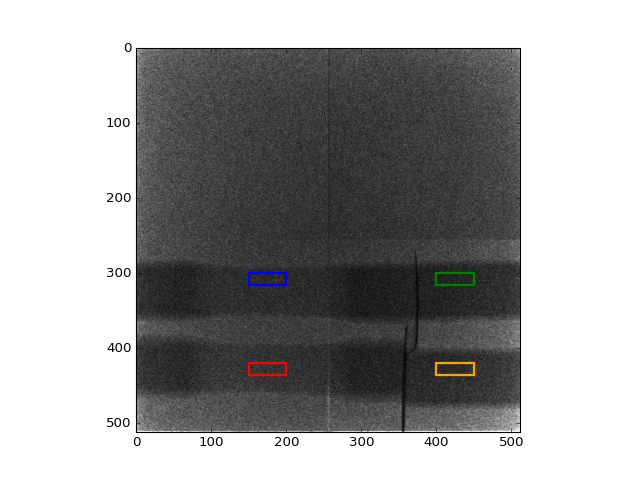

<IPython.core.display.Javascript object>


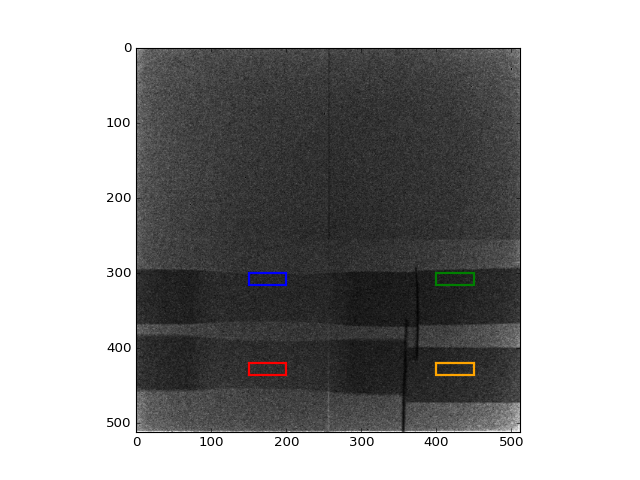

In [21]:
# Here I test different ROI position

# sumim = np.zeros([512,512])
# for i in range(1, len(coll_dir)):
#     fig,ax =plt.subplots()
#     value = rootpath + coll_dir[i]+'/'+coll_files[i][1500]
#     with fits.open(value) as f:
#         myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)
#     sumim +=myim
#     myim=fits.open(rootpath + coll_dir[i]+'/'+coll_files[i][1500])[0].data.astype(float)
#     ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
#     roi1= patches.Polygon([(150,420),(200,420),(200,435),(150,435)], edgecolor='red', facecolor='none',  linewidth=2)
#     ax.add_patch(roi1)
#     roi2= patches.Polygon([(150,300),(200,300),(200,315),(150,315)], edgecolor='blue', facecolor='none',  linewidth=2)
#     ax.add_patch(roi2)

#     roi3= patches.Polygon([(450,420),(400,420),(400,435),(450,435)], edgecolor='orange', facecolor='none',  linewidth=2)
#     ax.add_patch(roi3)
#     roi4= patches.Polygon([(450,300),(400,300),(400,315),(450,315)], edgecolor='green', facecolor='none',  linewidth=2)
#     ax.add_patch(roi4)

# fig,ax =plt.subplots()
# ax.imshow(sumim, vmin=150, vmax=1000, cmap='gray')


# roi1= patches.Polygon([(150,420),(200,420),(200,435),(150,435)], edgecolor='red', facecolor='none',  linewidth=2)
# ax.add_patch(roi1)
# roi2= patches.Polygon([(150,300),(200,300),(200,315),(150,315)], edgecolor='blue', facecolor='none',  linewidth=2)
# ax.add_patch(roi2)

# roi3= patches.Polygon([(450,420),(400,420),(400,435),(450,435)], edgecolor='orange', facecolor='none',  linewidth=2)
# ax.add_patch(roi3)
# roi4= patches.Polygon([(450,300),(400,300),(400,315),(450,315)], edgecolor='green', facecolor='none',  linewidth=2)
# ax.add_patch(roi4)

In [35]:
spectrum_ref1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ref2=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_stress1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_stress2=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_ref1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_ref2=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_stress1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_stress2=np.zeros([len(coll_dir), len(coll_files[0])])

In [36]:
# scaling ratios, this of course should be read in a much smarter way, and/or probably managed with dose correction instead of relying on the shutter counts
ob_ratios=np.array([107423.0/121694.0, 107423.0/101050.0, 107423.0/107552.0, 107423.0/96412.0, 107423.0/101731.0, 107423.0/102485.0, 107423.0/97977.0, 107423.0/99884.0, 107423.0/99997.0, 107423.0/107397.0, 107423.0/99095.0] )
print(ob_ratios)

[ 0.88273046  1.06306779  0.99880058  1.11420777  1.05595148  1.04818266
  1.09641038  1.07547755  1.07426223  1.00024209  1.08404057]


<IPython.core.display.Javascript object>


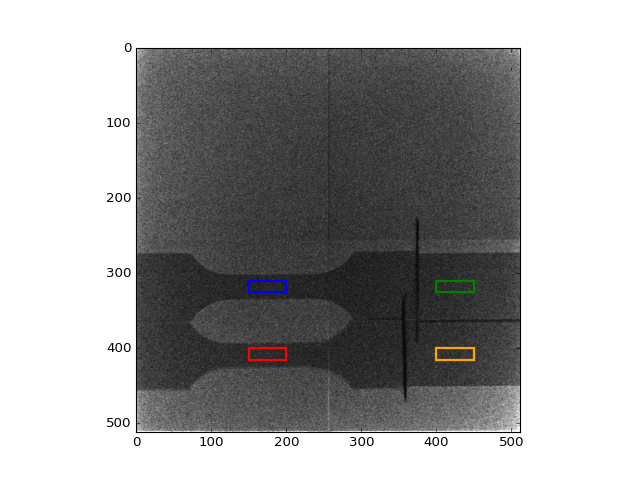

2451
(11, 2451)


In [37]:
#ROIs for 90 deg orientation
roi_stress1 = np.array([150,400,200,415])
roi_stress2 = np.array([150,310,200,325])
roi_ref1 = np.array([400,400,450,415])
roi_ref2 = np.array([400,310,450,325])

fig,ax =plt.subplots()
value = rootpath + coll_dir[0]+'/'+coll_files[0][1500]
with fits.open(value) as f:
    myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)

ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
roi1= patches.Polygon([(150,400),(200,400),(200,415),(150,415)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,310),(200,310),(200,325),(150,325)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(450,400),(400,400),(400,415),(450,415)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,310),(400,310),(400,325),(450,325)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)


print(len(coll_files[0]))
print(np.shape(spectrum_ref1))

for i in range(0, len(coll_files[0])):
    name = rootpath + coll_dir[0]+'/'+coll_files[0][i]
    with fits.open(name) as f:
        im_ref1 = (f[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
        im_ref2 = (f[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
        im_stress1 = (f[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
        im_stress2 = (f[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
        spectrum_ref1[0][i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
        spectrum_ref2[0][i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
        spectrum_stress1[0][i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
        spectrum_stress2[0][i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])
    
    nameOB = pathOB + coll_ob[i]
    with fits.open(nameOB) as fOB:
        ob_ref1= (fOB[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)*ob_ratios[0]
        ob_ref2= (fOB[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)*ob_ratios[0]
        ob_stress1= (fOB[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)*ob_ratios[0]
        ob_stress2= (fOB[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)*ob_ratios[0]
        spectrum_ob_ref1[0][i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
        spectrum_ob_ref2[0][i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
        spectrum_ob_stress1[0][i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
        spectrum_ob_stress2[0][i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])



    


<IPython.core.display.Javascript object>


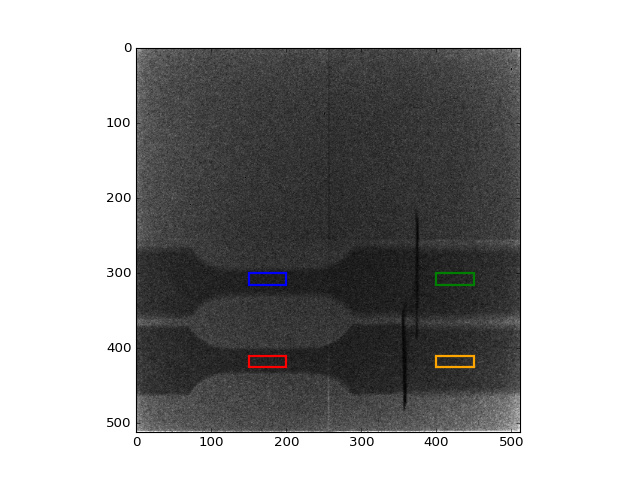

/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10099deg_Corrected/Sample_10099deg_Corrected_01500.fits


In [38]:
# ROIs for orientation: 99, 108, 117, 126, 135, 144, 153, 162
roi_stress1 = np.array([150,410,200,425])
roi_stress2 = np.array([150,300,200,315])
roi_ref1 = np.array([400,410,450,425])
roi_ref2 = np.array([400,300,450,315])


fig,ax =plt.subplots()
value = rootpath + coll_dir[1]+'/'+coll_files[1][1500]
print(value)
with fits.open(value) as f:
    myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)

ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
roi1= patches.Polygon([(150,410),(200,410),(200,425),(150,425)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,300),(200,300),(200,315),(150,315)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(450,410),(400,410),(400,425),(450,425)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,300),(400,300),(400,315),(450,315)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)

for i in range(0, len(coll_files[0])):
    name = rootpath + coll_dir[1]+'/'+coll_files[1][i]
    with fits.open(name) as f:
        im_ref1 = (f[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
        im_ref2 = (f[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
        im_stress1 = (f[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
        im_stress2 = (f[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
        spectrum_ref1[1][i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
        spectrum_ref2[1][i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
        spectrum_stress1[1][i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
        spectrum_stress2[1][i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])
    
    nameOB = pathOB + coll_ob[i]
    with fits.open(nameOB) as fOB:
        ob_ref1= (fOB[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)*ob_ratios[1]
        ob_ref2= (fOB[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)*ob_ratios[1]
        ob_stress1= (fOB[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)*ob_ratios[1]
        ob_stress2= (fOB[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)*ob_ratios[1]
        spectrum_ob_ref1[1][i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
        spectrum_ob_ref2[1][i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
        spectrum_ob_stress1[1][i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
        spectrum_ob_stress2[1][i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])


<IPython.core.display.Javascript object>


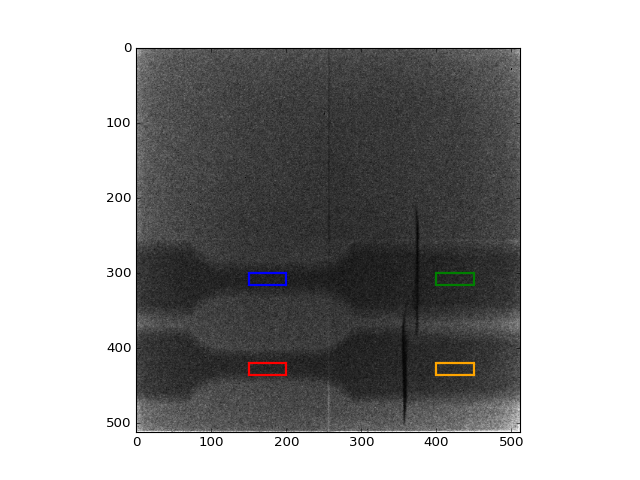

/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10108deg_Corrected/Sample_10108deg_Corrected_01500.fits
Sample_10108deg_Corrected
Sample_10117deg_Corrected
Sample_10126deg_Corrected
Sample_10135deg_Corrected
Sample_10144deg_Corrected
Sample_10153deg_Corrected
Sample_10162deg_Corrected


In [39]:
# ROIs FOR ORIENTATION;  108, 117, 126, 135, 144, 153, 162
roi_stress1 = np.array([150,420,200,435])
roi_stress2 = np.array([150,300,200,315])
roi_ref1 = np.array([400,420,450,435])
roi_ref2 = np.array([400,300,450,315])

fig,ax =plt.subplots()
value = rootpath + coll_dir[2]+'/'+coll_files[2][1500]
print(value)
with fits.open(value) as f:
    myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)

ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
roi1= patches.Polygon([(150,420),(200,420),(200,435),(150,435)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,300),(200,300),(200,315),(150,315)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(450,420),(400,420),(400,435),(450,435)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,300),(400,300),(400,315),(450,315)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)

for j in range(2,9):
    print(coll_dir[j])

    for i in range(0, len(coll_files[0])):
        name = rootpath + coll_dir[j]+'/'+coll_files[j][i]
        with fits.open(name) as f:
            im_ref1 = (f[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
            im_ref2 = (f[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
            im_stress1 = (f[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
            im_stress2 = (f[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
            spectrum_ref1[j][i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
            spectrum_ref2[j][i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
            spectrum_stress1[j][i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
            spectrum_stress2[j][i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])

        nameOB = pathOB + coll_ob[i]
        with fits.open(nameOB) as fOB:
            ob_ref1= (fOB[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)*ob_ratios[j]
            ob_ref2= (fOB[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)*ob_ratios[j]
            ob_stress1= (fOB[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)*ob_ratios[j]
            ob_stress2= (fOB[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)*ob_ratios[j]
            spectrum_ob_ref1[j][i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
            spectrum_ob_ref2[j][i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
            spectrum_ob_stress1[j][i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
            spectrum_ob_stress2[j][i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])



<IPython.core.display.Javascript object>


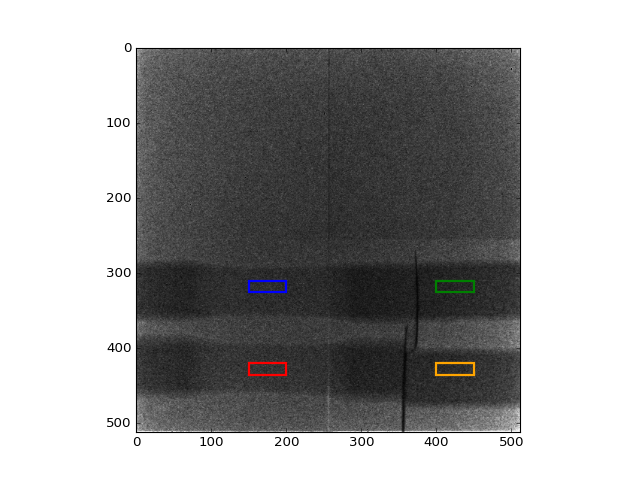

/data/data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10171deg_Corrected/Sample_10171deg_Corrected_01500.fits
Sample_10171deg_Corrected
Sample_10180deg_Corrected


In [40]:
#ROI for 171 and 180 deg orientation
roi_stress1 = np.array([150,420,200,435])
roi_stress2 = np.array([150,310,200,325])
roi_ref1 = np.array([400,420,450,435])
roi_ref2 = np.array([400,310,450,325])


fig,ax =plt.subplots()
value = rootpath + coll_dir[9]+'/'+coll_files[9][1500]
print(value)
with fits.open(value) as f:
    myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)

ax.imshow(myim, vmin=0, vmax=200, cmap="gray")
roi1= patches.Polygon([(150,420),(200,420),(200,435),(150,435)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi1)
roi2= patches.Polygon([(150,310),(200,310),(200,325),(150,325)], edgecolor='blue', facecolor='none',  linewidth=2)
ax.add_patch(roi2)

roi3= patches.Polygon([(450,420),(400,420),(400,435),(450,435)], edgecolor='orange', facecolor='none',  linewidth=2)
ax.add_patch(roi3)
roi4= patches.Polygon([(450,310),(400,310),(400,325),(450,325)], edgecolor='green', facecolor='none',  linewidth=2)
ax.add_patch(roi4)


for j in range(9,11):
    print(coll_dir[j])

    for i in range(0, len(coll_files[0])):
        name = rootpath + coll_dir[j]+'/'+coll_files[j][i]
        with fits.open(name) as f:
            im_ref1 = (f[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
            im_ref2 = (f[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
            im_stress1 = (f[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
            im_stress2 = (f[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
            spectrum_ref1[j][i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
            spectrum_ref2[j][i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
            spectrum_stress1[j][i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
            spectrum_stress2[j][i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])

        nameOB = pathOB + coll_ob[i]
        with fits.open(nameOB) as fOB:
            ob_ref1= (fOB[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)*ob_ratios[j]
            ob_ref2= (fOB[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)*ob_ratios[j]
            ob_stress1= (fOB[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)*ob_ratios[j]
            ob_stress2= (fOB[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)*ob_ratios[j]
            spectrum_ob_ref1[j][i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
            spectrum_ob_ref2[j][i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
            spectrum_ob_stress1[j][i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
            spectrum_ob_stress2[j][i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])



In [ ]:
# At this point I have all spectrum for the selected ROIs and need to do some smart plot

<IPython.core.display.Javascript object>


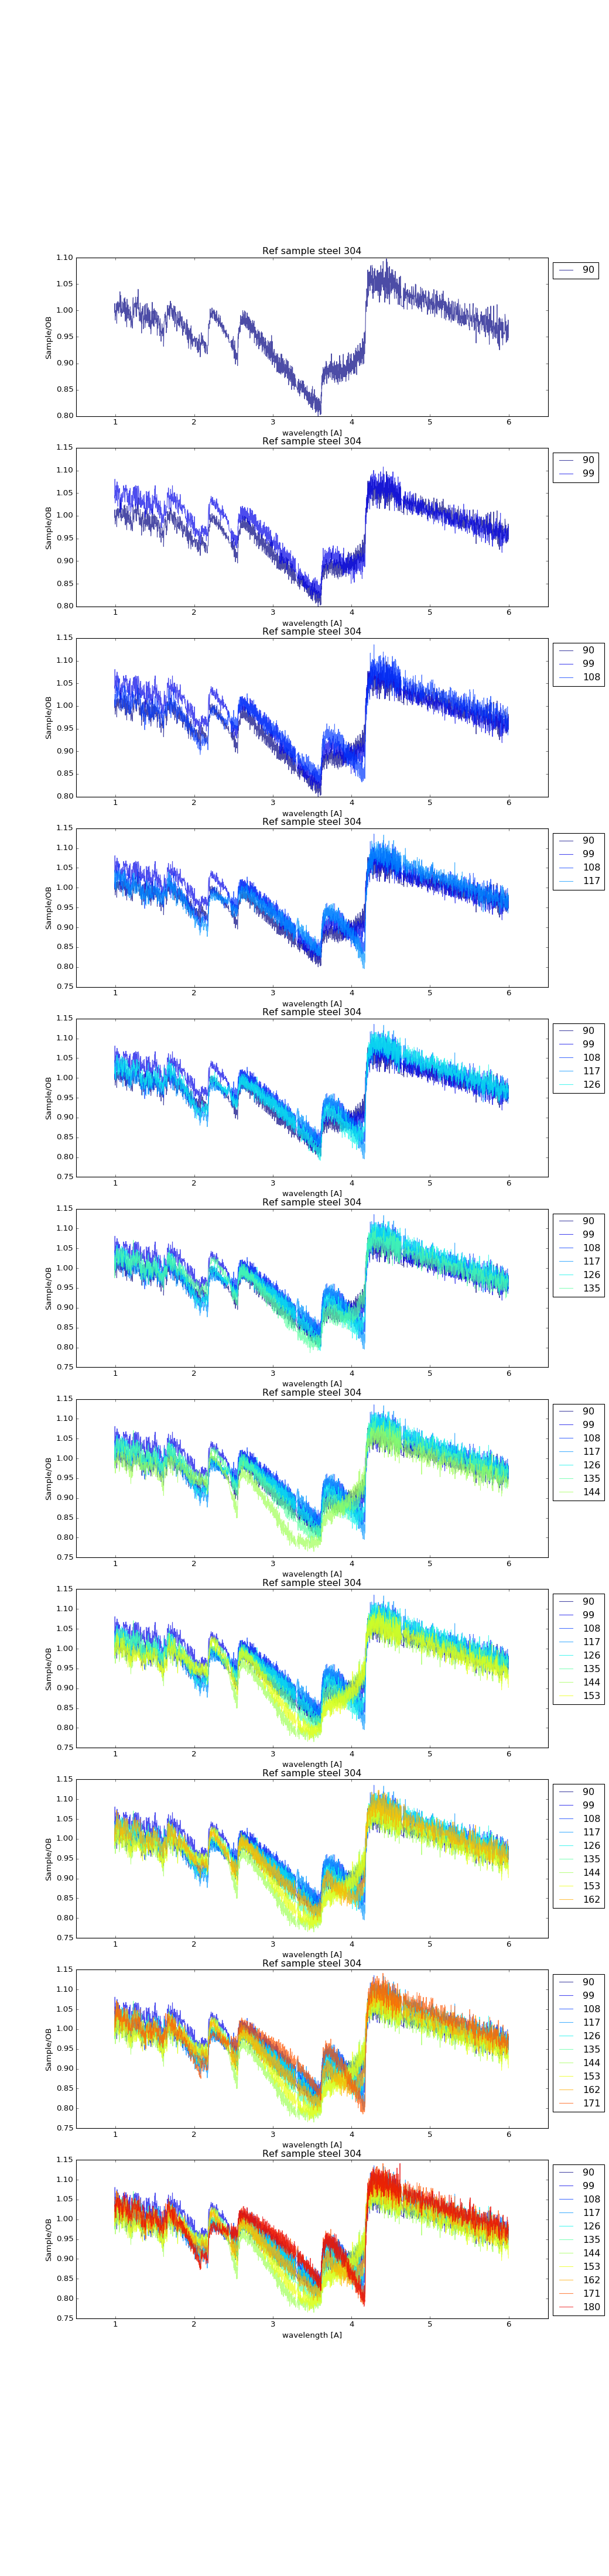

In [61]:
mylambda=tof2l(myTOF)

# for i in range(0, len(coll_dir)):

#     ref1_spectrum_norm=(spectrum_ref1[i][:]/spectrum_ob_ref1[i][:])
#     ref2_spectrum_norm=(spectrum_ref2[i][:]/spectrum_ob_ref2[i][:])
#     stress1_spectrum_norm=(spectrum_stress1[i][:]/spectrum_ob_stress1[i][:])
#     stress2_spectrum_norm=(spectrum_stress2[i][:]/spectrum_ob_stress1[i][:]) #something is wierd with the spetrum_ob_stress2
    

#     fig, axarr = plt.subplots(2,2, figsize=(12,6))
#     axarr[0,0].plot(mylambda, ref1_spectrum_norm, color='orange')
#     axarr[0,0].set_title('Ref sample steel 304')
#     axarr[0,0].set_ylabel('sample/ob')
#     axarr[0,0].set_xlabel('lambda [A]')
#     axarr[0,0].xlim()

#     axarr[1,0].plot(mylambda, stress1_spectrum_norm, color='red')
#     axarr[1,0].set_title('Stressed sample, steel 304, 40%')
#     axarr[1,0].set_ylabel('sample/ob')
#     axarr[1,0].set_xlabel('lambda [A]')

#     axarr[0,1].plot(mylambda, ref2_spectrum_norm, color='green')
#     axarr[0,1].set_title('Ref sample steel 316')
#     axarr[0,1].set_ylabel('sample/ob')
#     axarr[0,1].set_xlabel('lambda [A]')
#     # axarr[1,0].plot(mylambda, stress2_spectrum_norm, color='blue')

#     axarr[1,1].plot(mylambda, stress2_spectrum_norm, color='blue')
#     axarr[1,1].set_title('Stressed sample steel 316, 40%')
#     axarr[1,1].set_ylabel('sample/ob')
#     axarr[1,1].set_xlabel('lambda [A]')

#     st = fig.suptitle(coll_dir[i], fontsize="x-large")
#     st.set_y(0.99)
#     fig.subplots_adjust(top=0.85)
#     plt.tight_layout()

fig, ax = plt.subplots(11,1,figsize=[13,55])
    
for j in range(0, len(coll_dir)):


    # cmap = matplotlib.cm.rainbow
    cmap = matplotlib.cm.jet
    labels = np.chararray(11)
    labels=('90','99','108','117','126','135','144','153','162','171','180')

    for i in range(0, j+1):

        ref1_spectrum_norm=(spectrum_ref1[i][:]/spectrum_ob_ref1[i][:])
        last_part = np.mean(ref1_spectrum_norm[1500:2000])
        ax[j].plot(mylambda, ref1_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#         plt.plot(mylambda, ref1_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].set_xlim(0.5,6.5)
        ax[j].set_title('Ref sample steel 304')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('Sample/OB')

    ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))


fig.savefig('Ref_steel_304.eps', format='eps', dpi=400)



<IPython.core.display.Javascript object>


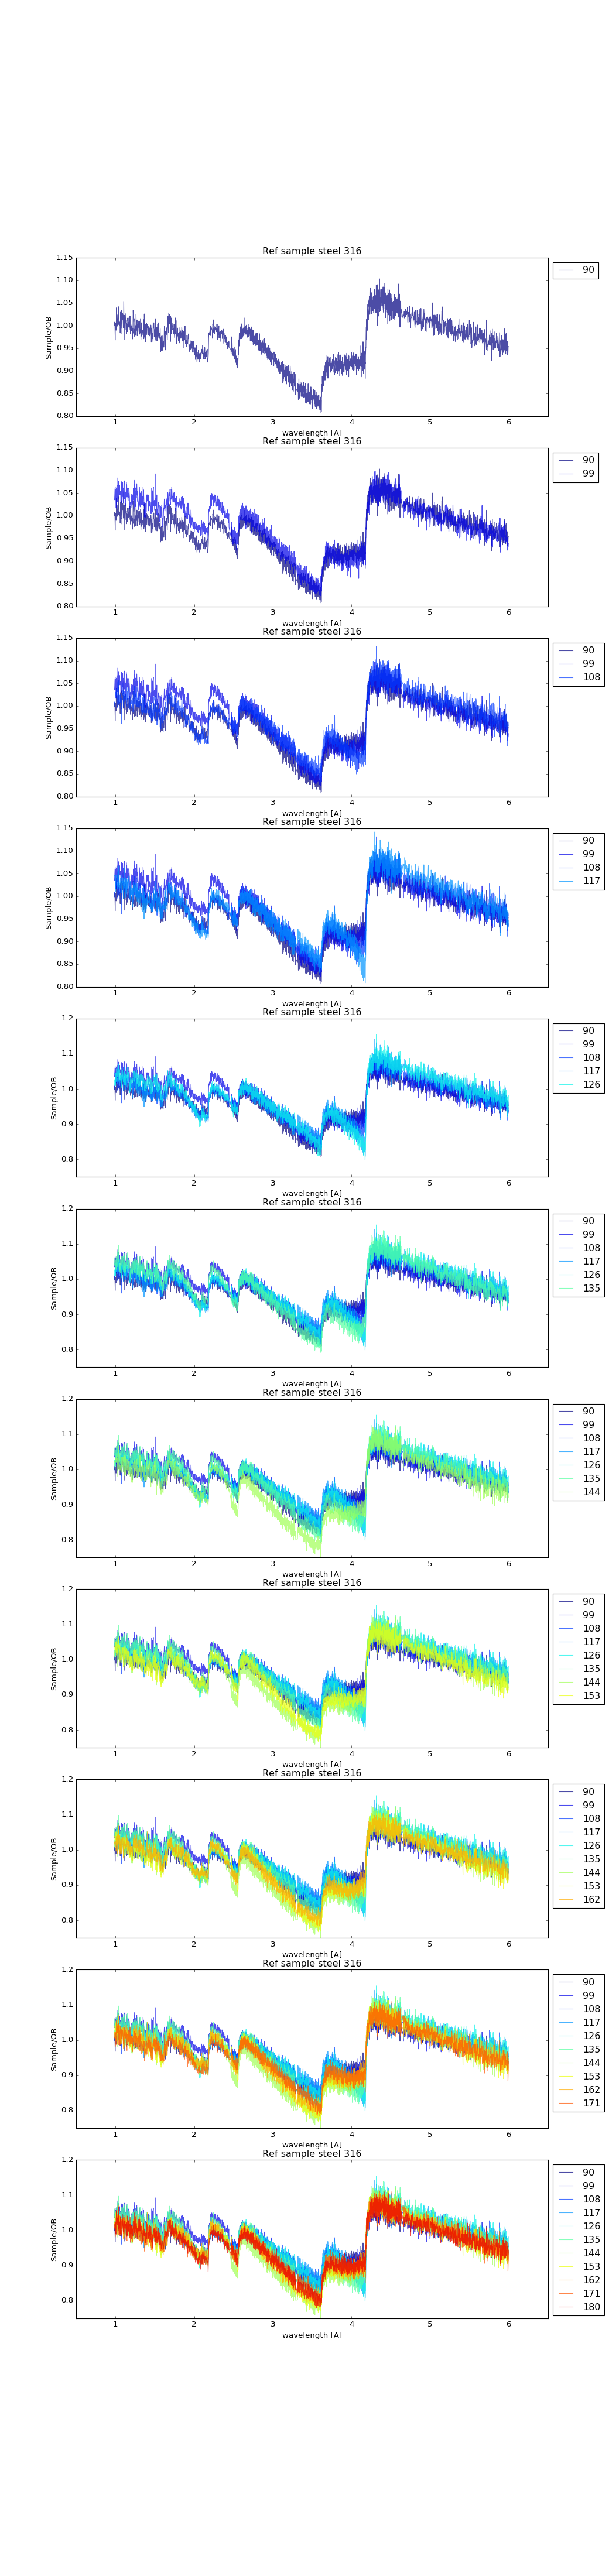

In [62]:
fig, ax = plt.subplots(11,1,figsize=[13,55])
# cmap = matplotlib.cm.rainbow

cmap = matplotlib.cm.jet
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')
for j in range(0, len(coll_dir)):
    for i in range(0, j+1):
        
        ref2_spectrum_norm=(spectrum_ref2[i][:]/spectrum_ob_ref2[i][:])
        last_part = np.mean(ref2_spectrum_norm[1500:2000])
#         plt.plot(mylambda, ref2_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].plot(mylambda, ref2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].set_xlim(0.5,6.5)
        ax[j].set_title('Ref sample steel 316')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('Sample/OB')

    ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))

fig.savefig('Ref_steel_316.eps', format='eps', dpi=400)


<IPython.core.display.Javascript object>


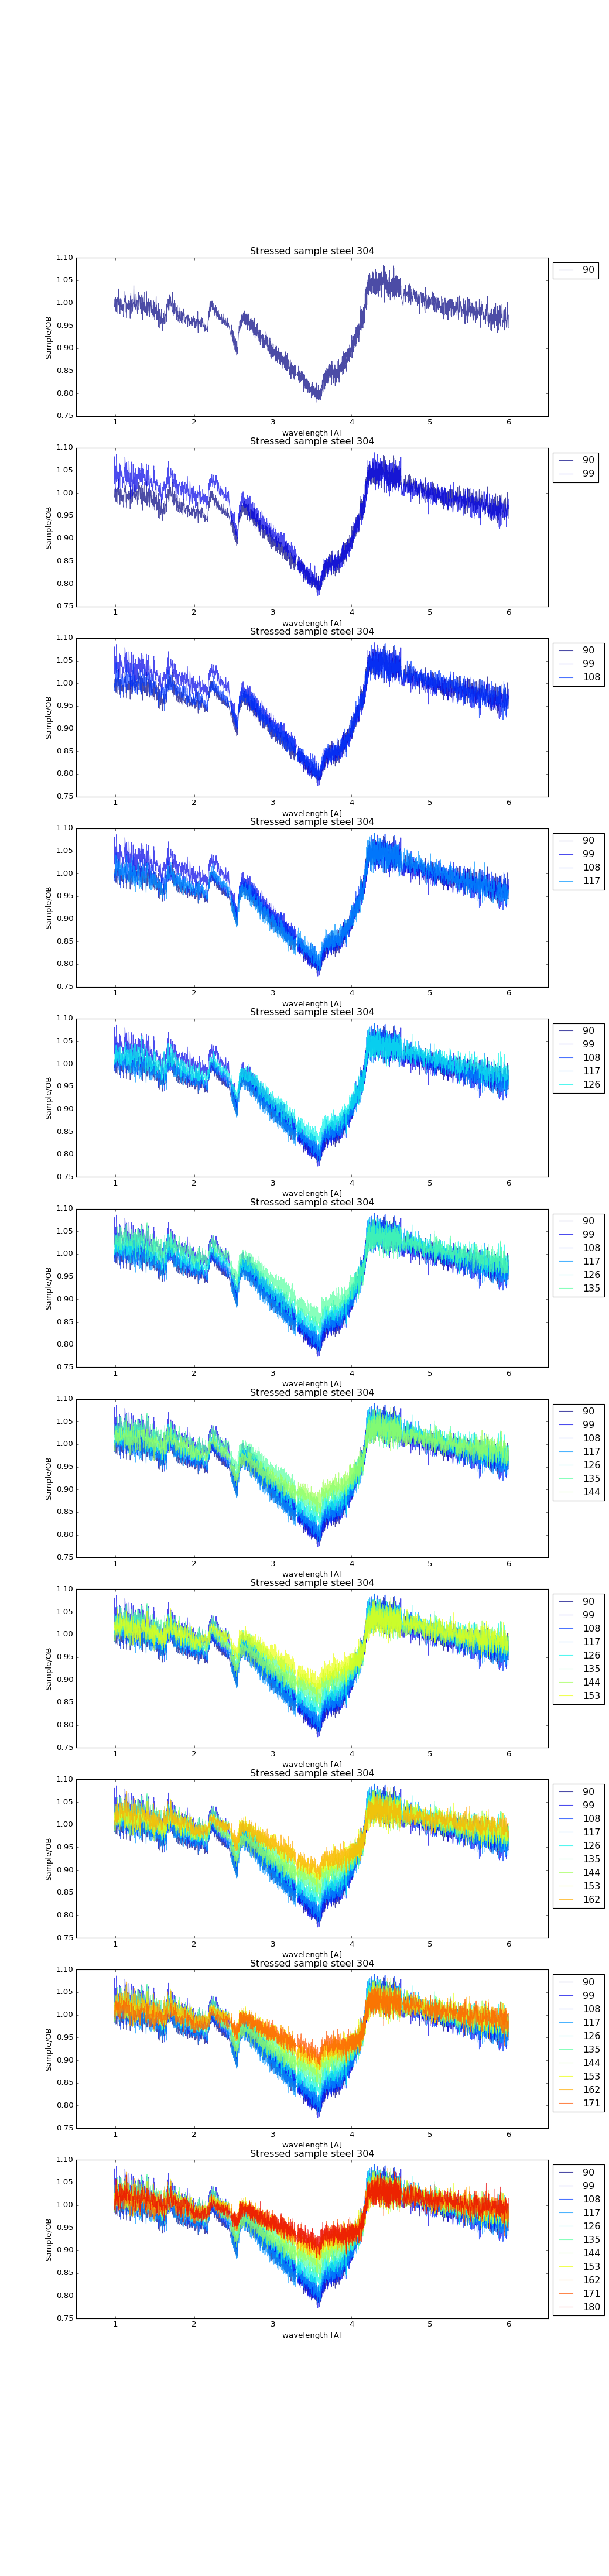

In [63]:
fig, ax = plt.subplots(11,1,figsize=[13,55])
# cmap = matplotlib.cm.rainbow
cmap = matplotlib.cm.jet
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')

for j in range(0, len(coll_dir)):
    for i in range(0, j+1):
    
        stress1_spectrum_norm=(spectrum_stress1[i][:]/spectrum_ob_stress1[i][:])
        last_part = np.mean(stress1_spectrum_norm[1500:2000])
        ax[j].plot(mylambda, stress1_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].set_xlim(0.5,6.5)
        ax[j].set_title('Stressed sample steel 304')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('Sample/OB')

    ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))

fig.savefig('Stress_steel_304.eps', format='eps', dpi=400)


<IPython.core.display.Javascript object>


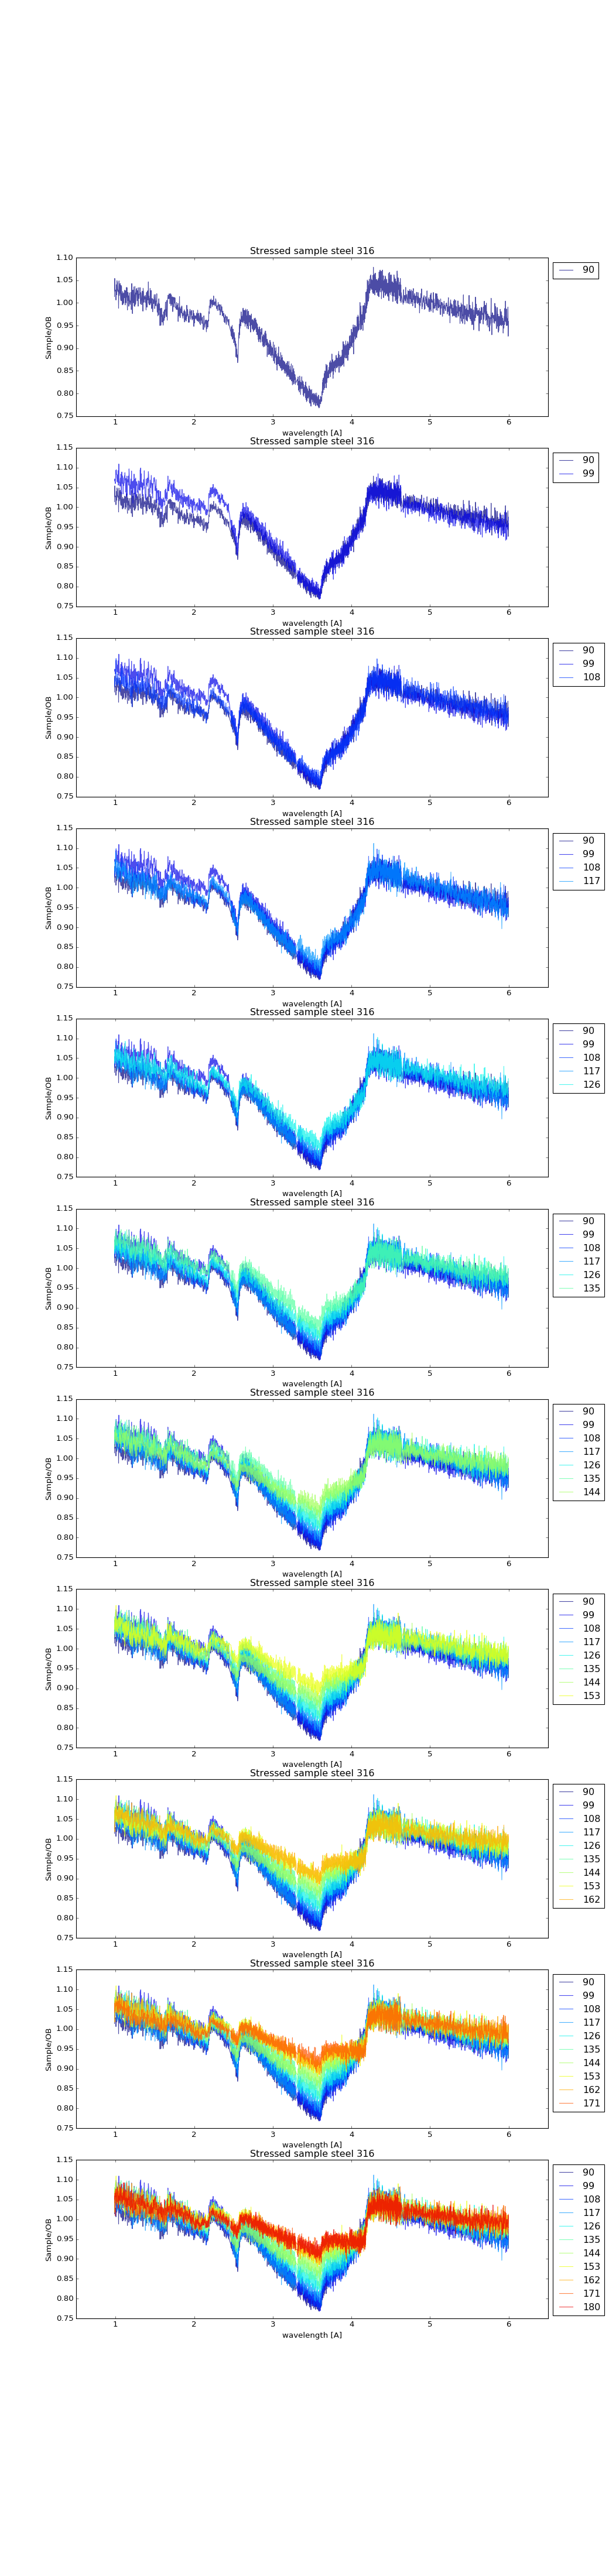

In [64]:

fig, ax = plt.subplots(11,1,figsize=[13,55])
# cmap = matplotlib.cm.rainbow
cmap = matplotlib.cm.jet
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')

for j in range(0, len(coll_dir)):
    for i in range(0, j+1):    
        stress2_spectrum_norm=(spectrum_stress2[i][:]/spectrum_ob_stress1[i][:])
        last_part = np.mean(stress2_spectrum_norm[1500:2000])
        ax[j].plot(mylambda, stress2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].set_xlim(0.5,6.5)
        ax[j].set_title('Stressed sample steel 316')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('Sample/OB')

    ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))

fig.savefig('Stress_steel_316.eps', format='eps', dpi=400)

In [ ]:
# ## This is how to plot only one figure with all spectrum overimposed, and not normalized by the last part of the spectrum 

# fig, ax = plt.subplots()
# # cmap = matplotlib.cm.rainbow
# cmap = matplotlib.cm.jet
# labels = np.chararray(11)
# labels=('90','99','108','117','126','135','144','153','162','171','180')

# for i in range(0, len(coll_dir)):
    
#     ref1_spectrum_norm=(spectrum_ref1[i][:]/spectrum_ob_ref1[i][:])
#     plt.plot(mylambda, ref2_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#     plt.xlim(0.5,6.5)
#     plt.title('Ref sample steel 316')
#     plt.xlabel('wavelength [A]')
#     plt.ylabel('Sample/OB')

# plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# fig, ax = plt.subplots()
# # cmap = matplotlib.cm.rainbow
# cmap = matplotlib.cm.jet
# labels = np.chararray(11)
# labels=('90','99','108','117','126','135','144','153','162','171','180')

# for i in range(0, len(coll_dir)):
    
#     ref2_spectrum_norm=(spectrum_ref2[i][:]/spectrum_ob_ref2[i][:])
#     plt.plot(mylambda, ref2_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#     plt.xlim(0.5,6.5)
#     plt.title('Ref sample steel 316')
#     plt.xlabel('wavelength [A]')
#     plt.ylabel('Sample/OB')

# plt.legend(loc='upper left', bbox_to_anchor=(1,1))


# fig, ax = plt.subplots()
# # cmap = matplotlib.cm.rainbow
# cmap = matplotlib.cm.jet
# labels = np.chararray(11)
# labels=('90','99','108','117','126','135','144','153','162','171','180')

# for i in range(0, len(coll_dir)):
    
#     stress1_spectrum_norm=(spectrum_stress1[i][:]/spectrum_ob_stress1[i][:])
#     plt.plot(mylambda, stress1_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#     plt.xlim(0.5,6.5)
#     plt.title('Stressed sample steel 304')
#     plt.xlabel('wavelength [A]')
#     plt.ylabel('Sample/OB')

# plt.legend(loc='upper left', bbox_to_anchor=(1,1))


# fig, ax = plt.subplots()
# # cmap = matplotlib.cm.rainbow
# cmap = matplotlib.cm.jet
# labels = np.chararray(11)
# labels=('90','99','108','117','126','135','144','153','162','171','180')

# for i in range(0, len(coll_dir)):
    
#     stress2_spectrum_norm=(spectrum_stress2[i][:]/spectrum_ob_stress1[i][:])
#     plt.plot(mylambda, stress2_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#     plt.xlim(0.5,6.5)
#     plt.title('Stressed sample steel 316')
#     plt.xlabel('wavelength [A]')
#     plt.ylabel('Sample/OB')

# plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [ ]:
# This is how to compute the spectrum from an image roi given as input for a sigle TOF sequence

# roi_ref1=np.array([400,402,450,420])
# roi_ref2=np.array([400,308,450,325])

# roi_stress1=np.array([150,390,200,430])
# roi_stress2=np.array([150,295,200,335])



# plt.imshow(myim[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]])


# for i in range(0, len(coll_files)):
#     im_ref1=(fits.open(pathdata+coll_files[i])[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
#     im_ref2=(fits.open(pathdata+coll_files[i])[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
#     im_stress1=(fits.open(pathdata+coll_files[i])[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
#     im_stress2=(fits.open(pathdata+coll_files[i])[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
    
#     ob_ref1=(fits.open(pathOB+coll_ob[i])[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float)
#     ob_ref2=(fits.open(pathOB+coll_ob[i])[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float)
#     ob_stress1=(fits.open(pathOB+coll_ob[i])[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float)
#     ob_stress2=(fits.open(pathOB+coll_ob[i])[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float)
    
#     spectrum_ref1[i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
#     spectrum_ref2[i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
#     spectrum_stress1[i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
#     spectrum_stress2[i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])
#     spectrum_ob_ref1[i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
#     spectrum_ob_ref2[i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
#     spectrum_ob_stress1[i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
#     spectrum_ob_stress2[i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])

In [ ]:
##the roi for the two orientations are slightly different because I want them now centered
# roi_ref1_180=np.array([400,305,450,322])
# roi_ref2_180=np.array([430,428,480,440])
# roi_stress1_180=np.array([150,410,200,430])
# roi_stress2_180=np.array([150,320,200,340])

# spectrum_ref1_180=np.zeros(len(coll_files_180))
# spectrum_ref2_180=np.zeros(len(coll_files_180))
# spectrum_stress1_180=np.zeros(len(coll_files_180))
# spectrum_stress2_180=np.zeros(len(coll_files_180))

# for i in range(0, len(coll_files_180)):
#     im_ref1_180=(fits.open(pathdata_180+coll_files_180[i])[0].data[roi_ref1_180[1]:roi_ref1_180[3],roi_ref1_180[0]:roi_ref1_180[2]]).astype(float)
#     im_ref2_180=(fits.open(pathdata_180+coll_files_180[i])[0].data[roi_ref2_180[1]:roi_ref2_180[3],roi_ref2_180[0]:roi_ref2_180[2]]).astype(float)
#     im_stress1_180=(fits.open(pathdata_180+coll_files_180[i])[0].data[roi_stress1_180[1]:roi_stress1_180[3],roi_stress1_180[0]:roi_stress1_180[2]]).astype(float)
#     im_stress2_180=(fits.open(pathdata_180+coll_files_180[i])[0].data[roi_stress2_180[1]:roi_stress2_180[3],roi_stress2_180[0]:roi_stress2_180[2]]).astype(float)
    
#     spectrum_ref1_180[i]=np.sum(im_ref1_180[~np.isnan(im_ref1_180) & ~np.isinf(im_ref1_180)])
#     spectrum_ref2_180[i]=np.sum(im_ref2_180[~np.isnan(im_ref2_180) & ~np.isinf(im_ref2_180)])
#     spectrum_stress1_180[i]=np.sum(im_stress1_180[~np.isnan(im_stress1_180) & ~np.isinf(im_stress1_180)])
#     spectrum_stress2_180[i]=np.sum(im_stress2_180[~np.isnan(im_stress2_180) & ~np.isinf(im_stress2_180)])

In [ ]:
# ref1_spectrum_norm=(spectrum_ref1/spectrum_ob_ref1)
# ref2_spectrum_norm=(spectrum_ref2/spectrum_ob_ref2)
# stress1_spectrum_norm=(spectrum_stress1/spectrum_ob_stress1)
# stress2_spectrum_norm=(spectrum_stress2/spectrum_ob_stress1) #something is wierd with the spetrum_ob_stress2
# mylambda=tof2l(myTOF)

# fig, axarr = plt.subplots(2,2, figsize=(12,6))
# axarr[0,0].plot(mylambda, ref1_spectrum_norm, color='orange')
# axarr[0,0].set_title('Ref sample steel 304')
# axarr[0,0].set_ylabel('sample/ob')
# axarr[0,0].set_xlabel('lambda [A]')

# axarr[1,0].plot(mylambda, stress1_spectrum_norm, color='red')
# axarr[1,0].set_title('Stressed sample, steel 304, 40%')
# axarr[1,0].set_ylabel('sample/ob')
# axarr[1,0].set_xlabel('lambda [A]')
# # 
# axarr[0,1].plot(mylambda, ref2_spectrum_norm, color='green')
# axarr[0,1].set_title('Ref sample steel 316')
# axarr[0,1].set_ylabel('sample/ob')
# axarr[0,1].set_xlabel('lambda [A]')
# # axarr[1,0].plot(mylambda, stress2_spectrum_norm, color='blue')

# axarr[1,1].plot(mylambda, stress2_spectrum_norm, color='blue')
# axarr[1,1].set_title('Stressed sample steel 316, 40%')
# axarr[1,1].set_ylabel('sample/ob')
# axarr[1,1].set_xlabel('lambda [A]')

# st = fig.suptitle("Sample position: 90deg", fontsize="x-large")
# st.set_y(0.99)
# fig.subplots_adjust(top=0.85)
# plt.tight_layout()

# axarr[1]=plt.plot(mylambda, ref2_spectrum_norm, color='green')

In [ ]:
# fig,ax =plt.subplots()
# myim=fits.open(pathdata_180+coll_files_180[1500])[0].data.astype(float)
# ax.imshow(myim, vmin=0, vmax=200, cmap="gray")

# roi1= patches.Polygon([(150,410),(200,410),(200,430),(150,430)], edgecolor='red', facecolor='none',  linewidth=2)
# ax.add_patch(roi1)
# roi2= patches.Polygon([(150,320),(200,320),(200,340),(150,340)], edgecolor='blue', facecolor='none',  linewidth=2)
# ax.add_patch(roi2)

# roi3= patches.Polygon([(480,420),(430,420),(430,440),(480,440)], edgecolor='orange', facecolor='none',  linewidth=2)
# ax.add_patch(roi3)
# roi4= patches.Polygon([(450,315),(400,315),(400,335),(450,335)], edgecolor='green', facecolor='none',  linewidth=2)
# ax.add_patch(roi4)


In [ ]:
# ref1_spectrum_norm_180=(spectrum_ref1_180/spectrum_ob_ref1)
# ref2_spectrum_norm_180=(spectrum_ref2_180/spectrum_ob_ref2)
# stress1_spectrum_norm_180=(spectrum_stress1_180/spectrum_ob_stress1)
# stress2_spectrum_norm_180=(spectrum_stress2_180/spectrum_ob_stress1) #something is wierd with the spetrum_ob_stress2
# mylambda=tof2l(myTOF)

# fig, axarr = plt.subplots(2,2, figsize=(12,6))
# axarr[0,0].plot(mylambda, ref1_spectrum_norm_180, color='orange')
# axarr[0,0].set_title('Ref sample steel 304')
# axarr[0,0].set_ylabel('sample/ob')
# axarr[0,0].set_xlabel('lambda [A]')

# axarr[1,0].plot(mylambda, stress1_spectrum_norm_180, color='red')
# axarr[1,0].set_title('Stressed sample, steel 304, 40%')
# axarr[1,0].set_ylabel('sample/ob')
# axarr[1,0].set_xlabel('lambda [A]')

# axarr[0,1].plot(mylambda, ref2_spectrum_norm_180, color='green')
# axarr[0,1].set_title('Ref sample steel 316')
# axarr[0,1].set_ylabel('sample/ob')
# axarr[0,1].set_xlabel('lambda [A]')

# axarr[1,1].plot(mylambda, stress2_spectrum_norm_180, color='blue')
# axarr[1,1].set_title('Stressed sample steel 316, 40%')
# axarr[1,1].set_ylabel('sample/ob')
# axarr[1,1].set_xlabel('lambda [A]')

# st = fig.suptitle("Sample position: 180deg", fontsize="x-large")
# st.set_y(0.99)
# fig.subplots_adjust(top=0.85)
# plt.tight_layout()

# plt.tight_layout()